In [289]:
import sys
sys.path.append('/usr/local/lib/python3.9/site-packages/')


import seaborn as sns
import bisect
import math
import matplotlib as plt
import pandas as pd
from pandas import Series,DataFrame
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import copy
import json
import lxml
from lxml import objectify 

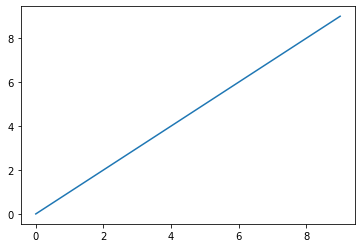

In [290]:
#matplotlib yo
data=np.arange(10)
plt.plot(data)

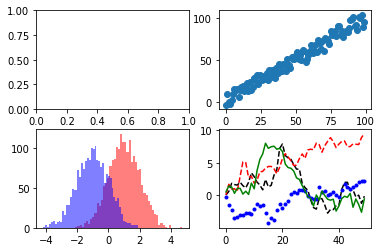

In [291]:
#Figure is like canvas
fig=plt.figure()
#Subplots are called axes inexplicably
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
#always plots in last subplot 
#kinda like tgraph with 1 index per x
plt.plot(np.random.randn(50).cumsum(),"k--")
#or better to do directly
ax4.plot(np.random.randn(50).cumsum(),"r--")
ax4.plot(np.random.randn(50).cumsum(),"b.")
ax4.plot(np.random.randn(50).cumsum(),"g-")
#k-- is a style argument k=black, r=red
#histograms with plt.hist
ax3.hist(np.random.randn(2000)+1.0,bins=50,color="red",alpha=0.5)
ax3.hist(np.random.randn(2000)-1.0,bins=50,color="blue",alpha=0.5)
#scatter plots with plt.scatter
#kinda like tgraph
ax2.scatter(np.arange(100),np.arange(100)+np.random.uniform(-10,10,size=100))

Figure(432x288)
[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)
AxesSubplot(0.547727,0.125;0.352273x0.343182)


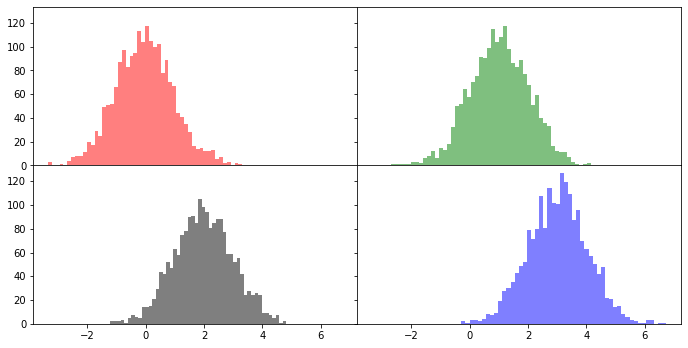

In [292]:
#you can make an array of subplots with plt.subplots()
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
#returns the figure and the subplots (called axes)
print (fig)
print (axes)
cols=["r","g","k","b"]
i=0
for aa in axes:
    for bb in aa:
        print (bb)
        bb.hist(np.random.randn(2000)+i,bins=50,color=cols[i],alpha=0.5)
        i+=1
#you can change the border sizes with something like
fig.subplots_adjust(left=0.0,right=1.5,bottom=0.4,top=1.5,wspace=0.0,hspace=0.)
#left right bottom top areabsolute,wspace,hspace is lr and tb white space


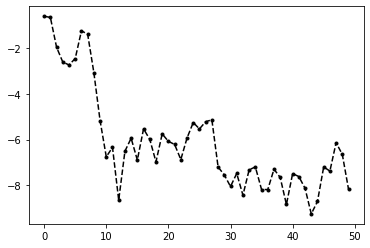

In [293]:
plt.plot(np.random.randn(50).cumsum(),color="k",linestyle="dashed",marker=".")

[Text(0, 0, 'a'),
 Text(14, 0, 'b'),
 Text(28, 0, 'c'),
 Text(42, 0, 'd'),
 Text(56, 0, 'e')]

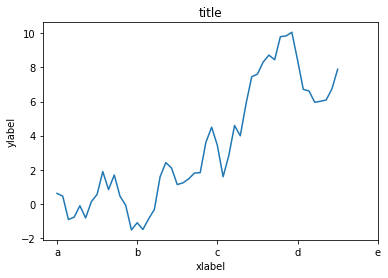

In [294]:
fig =plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(50).cumsum())
#ticks/labels are a property of the subplot
ax.set_xlabel("xlabel")
ax.set_ylabel("ylabel")
ax.set_title("title")
#set_xticks controls x labeling and also range
ax.set_xticks(np.arange(5)*14)
#set_xticklabels lets you replace labeling
ax.set_xticklabels(["a","b","c","d","e"])

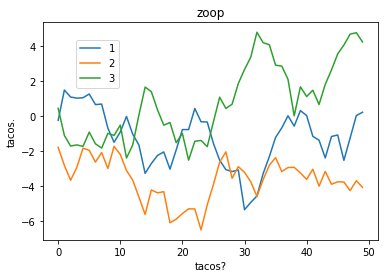

In [295]:
fig =plt.figure()
ax=fig.add_subplot(1,1,1)
cs1=np.random.randn(50).cumsum()
ax.plot(cs1,label="1")
ax.plot(np.random.randn(50).cumsum(),label="2")
ax.plot(np.random.randn(50).cumsum(),label="3")

#or all at once
setemall=   {
            "xlabel":"tacos?",
            "ylabel":"tacos." ,
            "title":"zoop"
            }
ax.set(**setemall)
#legends are added like this -- you need to add a label property to each line
ax.legend(loc=[0.1,0.7])

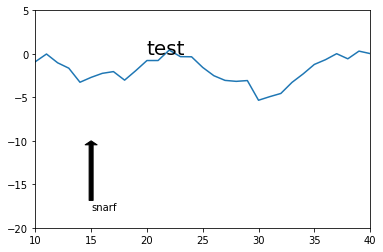

In [296]:
fig =plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(cs1,label="1")

#setrangeuser

ax.set_xlim(10,40)
ax.set_ylim(-20,5)

#can add text to a plot
#unlike root, this is in plot coordinate space

ax.text(20,0,"test",fontsize=20)

ax.annotate(xy=(15,-10),text="snarf",xytext=(15,-18),arrowprops=dict(facecolor="black",headlength=4))
fig.savefig("temp.pdf")

<AxesSubplot:>

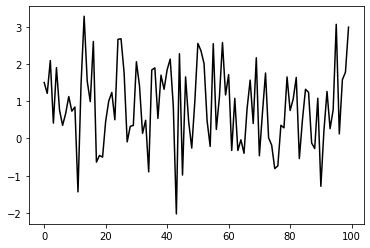

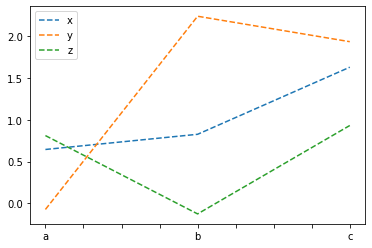

In [297]:
# you can also plot from pandas directly if you dont need full control 
aa=pd.Series(np.random.randn(100)+1.0)
bb=pd.DataFrame(np.random.randn(9).reshape(3,3)+1.0,index=["a","b","c"],columns=["x","y","z"])

aa.plot(style="k-")
bb.plot(style="--")


<AxesSubplot:>

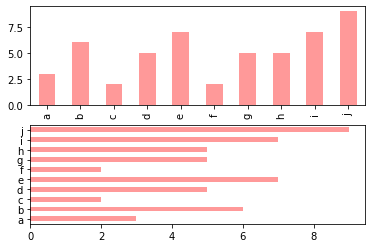

In [298]:
#bar plots
fig,axes=plt.subplots(2,1)
data=pd.Series(np.random.randint(0,10,size=10),index=list("abcdefghij"))
#pandas plot takes axis argument
data.plot.bar(ax=axes[0],alpha=0.4,color="r")
data.plot.barh(ax=axes[1],alpha=0.4,color="r")



<AxesSubplot:ylabel='Count'>

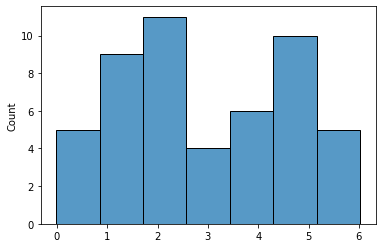

In [307]:
import seaborn as sns
sns.histplot(np.random.randn(50).cumsum())
#always plots in last subplot 


<AxesSubplot:>

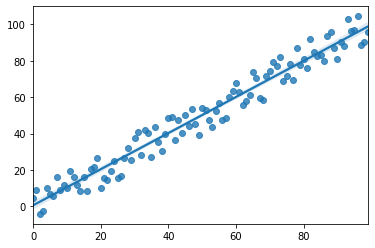

In [313]:

sns.regplot(x=np.arange(100),y=np.arange(100)+np.random.uniform(-10,10,size=100))

<function curve_fit at 0x1a051ff70>


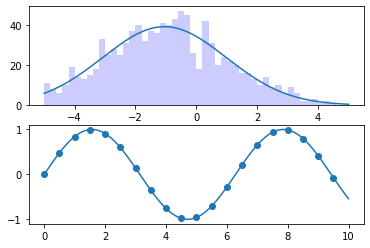

In [388]:
#Generic fitting

gausvals=np.random.normal(-1,2,size=1000)
fig,ax=plt.subplots(2,1)
#bin_heights, bin_borders, _ =ax[0].hist(gausvals,bins=50,range=(-5,5),color="blue",alpha=0.2)
histreturn =ax[0].hist(gausvals,bins=50,range=(-5,5),color="blue",alpha=0.2)
bin_heights, bin_borders, _ = histreturn
#super important, put in function
from scipy.optimize import curve_fit
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))
bin_centers= bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax[0].plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')

def msin(x,d1,f1):
    return np.sin(x)/f1+d1
xv=np.arange(20)/2
yv=np.sin(xv)
scval=ax[1].scatter(xv,yv)
fitv,cov=curve_fit(msin,xv,yv)
x_interval_for_fit = np.arange(2000)/200
print (curve_fit)
ax[1].plot(x_interval_for_fit,msin(x_interval_for_fit,*fitv))




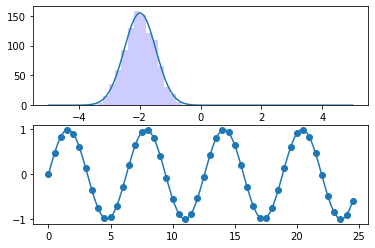

In [430]:
#generic plotting function. Need to return fit parameters and covariance, 
#also need to get uncertainties right
def gfit(plot,func,res=100):
    if isinstance(plot,matplotlib.collections.PathCollection):
        returndat=(plot.get_offsets().data)
        xv = returndat[:,0]
        yv = returndat[:,1]
        x_interval_for_fit= np.linspace(min(xv),max(xv),res)
        
    if isinstance(plot,tuple):
        yv, bin_borders, _ = histreturn
        xv= bin_borders[:-1] + np.diff(bin_borders) / 2
        popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])
        x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], res)

    fitv,cov=curve_fit(func,xv,yv)
    yvals=func(x_interval_for_fit, *fitv)
    return(x_interval_for_fit,yvals)
     
fig,ax=plt.subplots(2,1)

xv=np.arange(50)/2
yv=np.sin(xv)
scval=ax[1].scatter(xv,yv)

fitx,fity=gfit(scval,msin)
ax[1].plot(fitx,fity)

gausvals=np.random.normal(-2,0.5,size=1000)
histreturn =ax[0].hist(gausvals,bins=50,range=(-5,5),color="blue",alpha=0.2)

fitx,fity=gfit(histreturn,gaussian)
ax[0].plot(fitx,fity)


